### Data Cleaning ###

**Imports**

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Chicago ###

**Reading In Data**

In [2]:
chi_df = pd.read_csv('../data/chi_accidents.csv')

In [3]:
chi_df.head(3)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_direction,wind_speed(mph),precipitation(in),weather_condition,amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-2749141,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,NaN,N Milwaukee Ave,R,Libertyville,Lake,IL,60048,US,US/Central,KUGN,2016-11-30 14:55:00,37.0,31.0,79.0,29.59,10.0,West,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-2749152,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,At US-14/Northwest Hwy - Accident.,21500.0,N IL Route 59,L,Barrington,Lake,IL,60010-2457,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
2,A-2749158,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,Between IL-22 and US-14/Northwest Hwy - Accident.,21501.0,N IL Route 59,R,Barrington,Lake,IL,60010-2456,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
chi_df.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'description', 'number', 'street',
       'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [5]:
chi_df.shape

(42472, 47)

In [6]:
chi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42472 entries, 0 to 42471
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     42472 non-null  object 
 1   severity               42472 non-null  int64  
 2   start_time             42472 non-null  object 
 3   end_time               42472 non-null  object 
 4   start_lat              42472 non-null  float64
 5   start_lng              42472 non-null  float64
 6   end_lat                42472 non-null  float64
 7   end_lng                42472 non-null  float64
 8   distance(mi)           42472 non-null  float64
 9   description            42472 non-null  object 
 10  number                 15879 non-null  float64
 11  street                 42472 non-null  object 
 12  side                   42472 non-null  object 
 13  city                   42471 non-null  object 
 14  county                 42472 non-null  object 
 15  st

In [7]:
chi_df.drop(columns = 'id', inplace = True)

**Addressing Null Counts**

In [8]:
chi_df.isna().sum().sort_values(ascending = False)[:20]

number                   26593
precipitation(in)        23129
wind_chill(f)            16332
wind_speed(mph)           2024
wind_direction             310
humidity(%)                244
visibility(mi)             120
temperature(f)             119
weather_condition          116
pressure(in)                68
weather_timestamp           64
timezone                     2
airport_code                 2
nautical_twilight            1
civil_twilight               1
sunrise_sunset               1
astronomical_twilight        1
city                         1
country                      0
give_way                     0
dtype: int64

In [9]:
chi_df[['number']]

,number
0,NaN
1,21500.0
2,21501.0
3,1194.0
4,7899.0
...,...
42467,NaN
42468,NaN
42469,3799.0
42470,NaN


In [10]:
#filling nulls in 'number' with 0
chi_df['number'].fillna(0, inplace = True)

In [11]:
#precipitation(in)
chi_df[['precipitation(in)']].value_counts()

precipitation(in)
0.00                 16032
0.01                  1012
0.02                   483
0.03                   312
0.04                   234
                     ...  
0.48                     1
0.46                     1
0.43                     1
0.37                     1
1.95                     1
Length: 78, dtype: int64

In [12]:
mean_precip = chi_df[['precipitation(in)']].mean()
mean_precip

precipitation(in)    0.011642
dtype: float64

In [13]:
median_precip = chi_df[['precipitation(in)']].median()
median_precip

precipitation(in)    0.0
dtype: float64

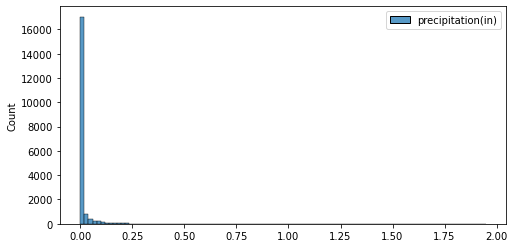

In [14]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['precipitation(in)']], bins = 100);

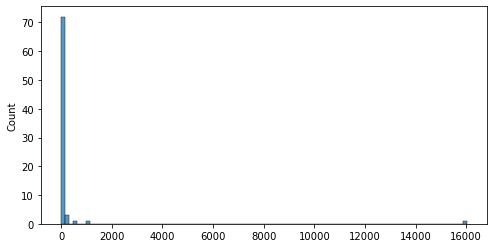

In [15]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['precipitation(in)']].value_counts().sort_index(), bins = 100);

In [16]:
chi_df['precipitation(in)'].fillna(0.00, inplace = True)

In [17]:
#wind_chill(f)
chi_df[['wind_chill(f)']].value_counts()

wind_chill(f)
 73.0            342
 31.0            336
 30.0            315
 72.0            304
 75.0            295
                ... 
 42.1              1
-18.3              1
-2.1               1
-3.1               1
-51.3              1
Length: 694, dtype: int64

In [18]:
chi_df[['wind_chill(f)']].value_counts().sort_index()

wind_chill(f)
-51.3             1
-50.5             1
-50.1             1
-48.5             1
-47.7             1
                 ..
 91.0            32
 92.0            35
 93.0            29
 94.0            26
 95.0             4
Length: 694, dtype: int64

In [19]:
mean_wind_chill = chi_df[['wind_chill(f)']].mean()
mean_wind_chill

wind_chill(f)    39.650593
dtype: float64

In [20]:
median_wind_chill = chi_df[['wind_chill(f)']].median()
median_wind_chill

wind_chill(f)    35.25
dtype: float64

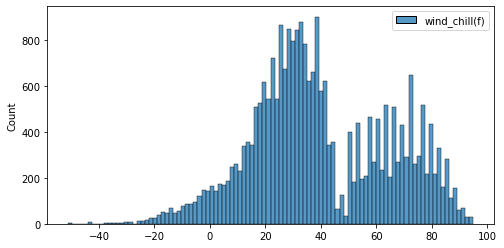

In [21]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_chill(f)']], bins = 100);

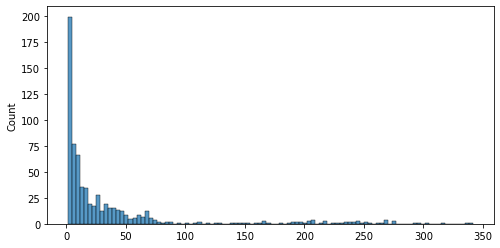

In [22]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_chill(f)']].value_counts().sort_values(), bins = 100);

In [214]:
chi_df['wind_chill(f)'].fillna(chi_df['temperature(f)'], inplace = True)
chi_df['wind_chill(f)'].isna().value_counts()

False    26010
Name: wind_chill(f), dtype: int64

In [24]:
#wind_speed(mph)
chi_df[['wind_speed(mph)']].value_counts()[0::2]

wind_speed(mph)
9.2                2718
6.9                2522
5.8                2260
4.6                1903
12.7               1764
9.0                1373
3.5                1349
6.0                1276
0.0                1079
12.0               1072
16.1                865
14.0                784
18.4                505
17.0                364
18.0                290
23.0                241
21.9                200
22.0                127
25.3                 63
24.0                 46
28.8                 29
29.0                 21
27.6                 18
30.0                 11
31.1                  5
32.2                  4
32.0                  2
36.8                  2
42.6                  2
61.0                  1
dtype: int64

In [25]:
chi_df[['wind_speed(mph)']].value_counts().sort_index()[0::2]

wind_speed(mph)
0.0                1079
3.5                1349
5.0                1076
6.0                1276
7.0                1342
8.1                2549
9.2                2718
10.4               2437
12.0               1072
13.0                896
14.0                784
16.0                441
17.0                364
18.0                290
19.6                363
20.7                256
21.9                200
23.0                241
24.2                 88
25.3                 63
26.5                 47
28.0                 19
29.0                 21
30.0                 11
31.1                  5
32.2                  4
34.5                  5
36.8                  2
39.1                  2
61.0                  1
dtype: int64

In [26]:
mean_wind_speed = chi_df[['wind_speed(mph)']].mean()
mean_wind_speed

wind_speed(mph)    10.003125
dtype: float64

In [27]:
median_wind_speed = chi_df[['wind_speed(mph)']].median()
median_wind_speed

wind_speed(mph)    9.2
dtype: float64

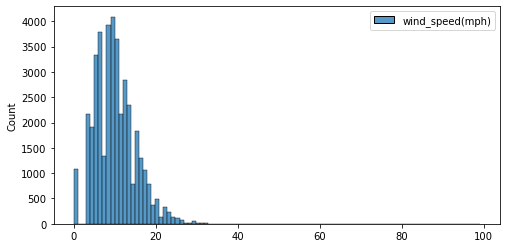

In [28]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_speed(mph)']], bins = 100);

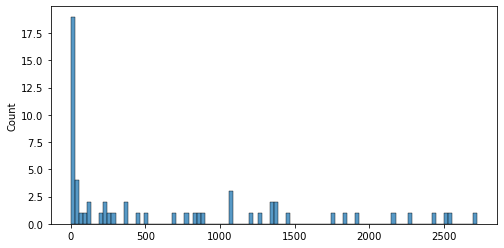

In [29]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_speed(mph)']].value_counts().sort_index(), bins = 100);

In [30]:
chi_df['wind_speed(mph)'].fillna(9.2, inplace = True)

In [31]:
#for frame of reference:
chi_df.isna().sum().sort_values(ascending = False)[:15]

wind_direction           310
humidity(%)              244
visibility(mi)           120
temperature(f)           119
weather_condition        116
pressure(in)              68
weather_timestamp         64
timezone                   2
airport_code               2
nautical_twilight          1
civil_twilight             1
sunrise_sunset             1
astronomical_twilight      1
city                       1
county                     0
dtype: int64

In [32]:
#wind_direction
chi_df[['wind_direction']].value_counts(ascending = False)

wind_direction
SSW               3110
West              2968
WSW               2767
SW                2546
South             2419
WNW               2412
NNE               2356
NE                2119
NW                2036
ENE               1979
NNW               1699
Calm              1658
North             1647
SSE               1645
East              1597
SE                1500
ESE               1485
W                 1295
S                 1190
E                 1190
CALM              1079
N                  609
Variable           579
VAR                277
dtype: int64

In [33]:
#https://stackoverflow.com/questions/44231598/python-pandas-get-dataframe-value-counts-result-as-list
chi_df['wind_direction'].value_counts()
chi_wind = chi_df['wind_direction'].value_counts()
chi_wind_dict = dict(chi_wind)

chi_wind_names = chi_wind_dict.keys()
chi_wind_values = chi_wind_dict.values()

In [34]:
#Colors for pie charts:
#https://stackoverflow.com/questions/21034830/how-can-i-generate-more-colors-on-pie-chart-matplotlib
import random
import matplotlib.colors as mcolors

colors = random.choices(list(mcolors.CSS4_COLORS.values()), k = 25)

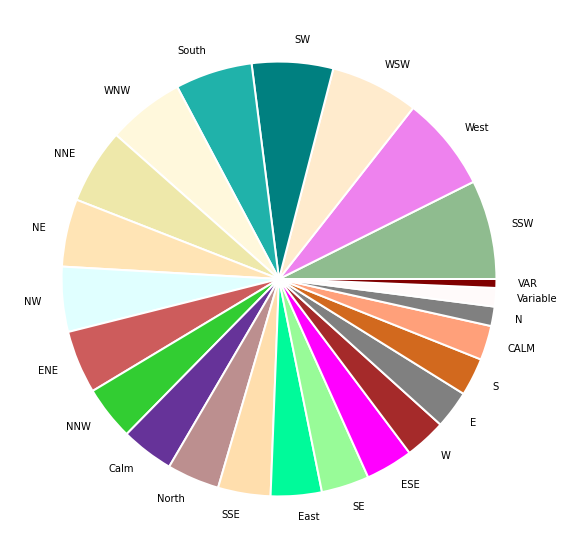

In [35]:
#https://www.python-graph-gallery.com/pie-plot-matplotlib-basic
plt.rcParams["figure.figsize"] = (10, 10)

# Create a pieplot
plt.pie(chi_wind_values, labels = chi_wind_names, colors = colors, 
        labeldistance = 1.1, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' });
plt.show();

In [36]:
#getting dummies for this variable, including the nulls
chi_df = pd.get_dummies(chi_df, columns = ['wind_direction'], dummy_na = True, drop_first = True)

In [37]:
#'humidity(%)'
chi_df[['humidity(%)']].value_counts()

humidity(%)
93.0           1446
89.0           1034
100.0           945
76.0            884
61.0            845
               ... 
16.0              4
17.0              2
13.0              2
14.0              1
6.0               1
Length: 88, dtype: int64

In [38]:
chi_df[['humidity(%)']].value_counts().sort_index()

humidity(%)
6.0              1
13.0             2
14.0             1
16.0             4
17.0             2
              ... 
96.0           755
97.0           460
98.0            66
99.0            89
100.0          945
Length: 88, dtype: int64

In [39]:
mean_humid = chi_df[['humidity(%)']].mean()
mean_humid 

humidity(%)    67.334375
dtype: float64

In [40]:
median_humid = chi_df[['humidity(%)']].median()
median_humid

humidity(%)    68.0
dtype: float64

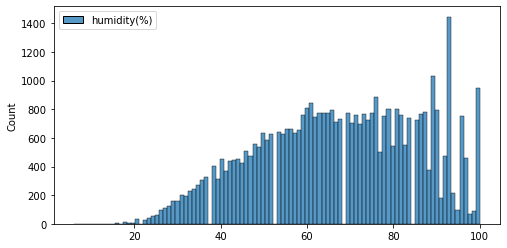

In [41]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['humidity(%)']], bins = 100);

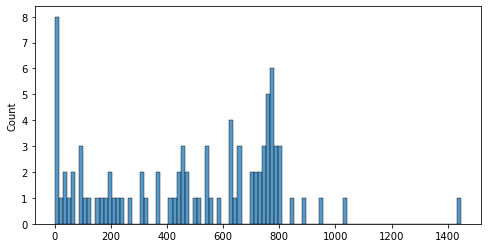

In [42]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['humidity(%)']].value_counts().sort_index(), bins = 100);

In [43]:
chi_df['humidity(%)'].fillna(68.0, inplace = True)

In [44]:
#'visibility(mi)'
chi_df[['visibility(mi)']].value_counts()[0::2]

visibility(mi)
10.00             32663
9.00               1278
8.00                935
3.00                795
2.00                625
2.50                328
0.50                199
1.20                153
0.20                100
0.75                 66
0.10                 24
0.00                 12
1.10                  4
0.06                  2
dtype: int64

In [45]:
chi_df[['visibility(mi)']].value_counts().sort_index()[0::2]

visibility(mi)
0.0                 12
0.1                 24
0.2                100
0.5                199
0.8                142
1.1                  4
1.5                228
2.0                625
3.0                795
5.0               1061
7.0               1296
9.0               1278
12.0                 9
20.0                64
dtype: int64

In [46]:
mean_vis = chi_df[['visibility(mi)']].mean()
mean_vis

visibility(mi)    8.896925
dtype: float64

In [47]:
median_vis = chi_df[['visibility(mi)']].median()
median_vis

visibility(mi)    10.0
dtype: float64

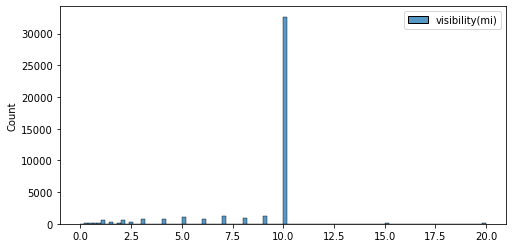

In [48]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['visibility(mi)']], bins = 100);

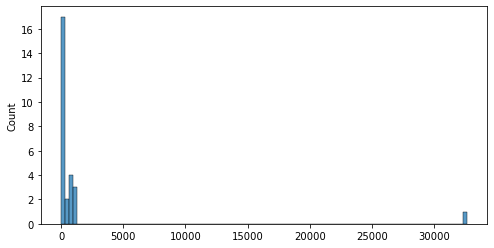

In [49]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['visibility(mi)']].value_counts().sort_index(), bins = 100);

In [50]:
chi_df['visibility(mi)'].fillna(10.0, inplace = True)

In [51]:
#temperature(f)
chi_df[['temperature(f)']].value_counts()

temperature(f)
73.0              814
72.0              738
32.0              707
75.0              695
79.0              688
                 ... 
14.7                1
14.2                1
13.8                1
13.3                1
168.8               1
Length: 558, dtype: int64

In [52]:
chi_df[['temperature(f)']].value_counts().sort_index()

temperature(f)
-22.4              1
-21.1              1
-20.9              4
-20.2              1
-20.0              2
                  ..
 93.9             21
 94.0             26
 95.0             13
 96.1              2
 168.8             1
Length: 558, dtype: int64

In [53]:
mean_temp = chi_df[['temperature(f)']].mean()
mean_temp

temperature(f)    53.024249
dtype: float64

In [54]:
median_temp = chi_df[['temperature(f)']].median()
median_temp

temperature(f)    53.1
dtype: float64

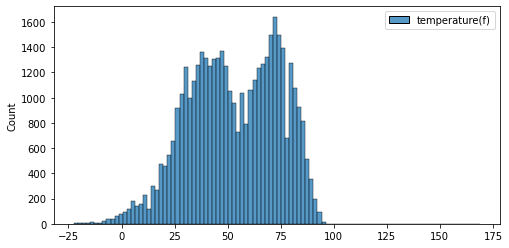

In [55]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['temperature(f)']], bins = 100);

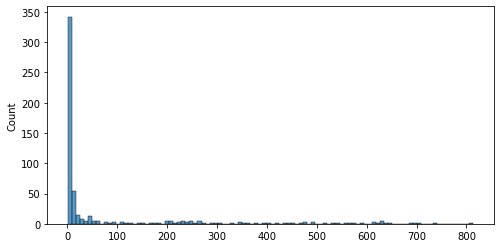

In [56]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['temperature(f)']].value_counts().sort_index(), bins = 100);

In [57]:
chi_df['temperature(f)'].fillna(53.1, inplace = True)

In [58]:
#for frame of reference:
chi_df.isna().sum().sort_values(ascending = False)[:13]

weather_condition        116
pressure(in)              68
weather_timestamp         64
airport_code               2
timezone                   2
civil_twilight             1
city                       1
sunrise_sunset             1
astronomical_twilight      1
nautical_twilight          1
wind_direction_E           0
wind_direction_ENE         0
wind_direction_NNW         0
dtype: int64

In [59]:
#weather_condition
chi_df[['weather_condition']].value_counts()

weather_condition           
Clear                           6931
Mostly Cloudy                   6876
Overcast                        6509
Fair                            5160
Partly Cloudy                   4574
Cloudy                          3447
Scattered Clouds                2374
Light Rain                      2193
Light Snow                      1610
Haze                             357
Rain                             341
Fog                              292
Light Drizzle                    242
Fair / Windy                     130
Mostly Cloudy / Windy            122
Cloudy / Windy                   114
Snow                             108
Light Thunderstorms and Rain     108
Heavy Rain                        94
Light Rain with Thunder           77
T-Storm                           73
Wintry Mix                        70
Light Freezing Rain               57
Thunderstorm                      56
Light Rain / Windy                50
Thunderstorms and Rain            50
Partly Cl

In [60]:
#top 25 frequent weather conditions:
chi_df[['weather_condition']].value_counts()[:25]

weather_condition           
Clear                           6931
Mostly Cloudy                   6876
Overcast                        6509
Fair                            5160
Partly Cloudy                   4574
Cloudy                          3447
Scattered Clouds                2374
Light Rain                      2193
Light Snow                      1610
Haze                             357
Rain                             341
Fog                              292
Light Drizzle                    242
Fair / Windy                     130
Mostly Cloudy / Windy            122
Cloudy / Windy                   114
Snow                             108
Light Thunderstorms and Rain     108
Heavy Rain                        94
Light Rain with Thunder           77
T-Storm                           73
Wintry Mix                        70
Light Freezing Rain               57
Thunderstorm                      56
Light Rain / Windy                50
dtype: int64

In [61]:
chi_df['weather_condition'].value_counts()[:25]
chi_weather = chi_df['weather_condition'].value_counts()[:25]
chi_weather_dict = dict(chi_weather)

chi_weather_names = chi_weather_dict.keys()
chi_weather_values = chi_weather_dict.values()

colors = random.choices(list(mcolors.CSS4_COLORS.values()), k = 25)

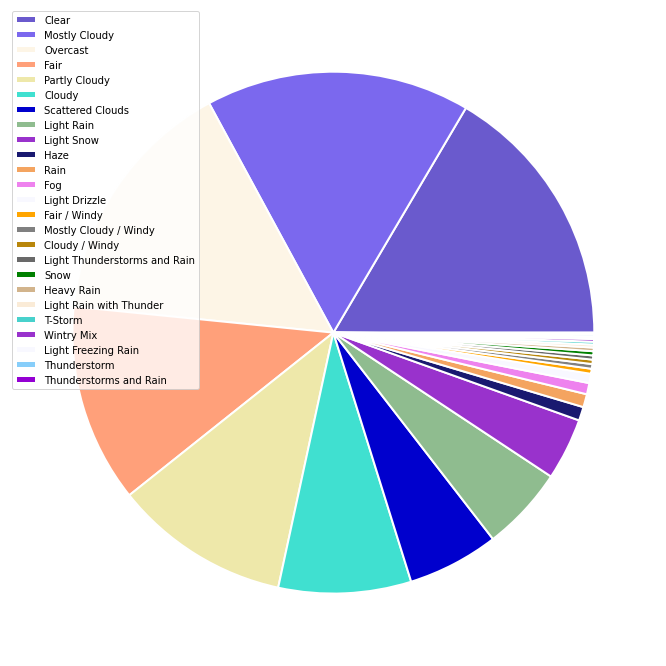

In [62]:
plt.rcParams["figure.figsize"] = (12, 12)

# Create a pieplot
plt.pie(chi_weather_values, labels = chi_weather_names, colors = colors, 
        labeldistance = None, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' });
plt.legend(loc = 0)
plt.show();

In [63]:
#getting dummies for this variable, including the nulls
chi_df = pd.get_dummies(chi_df, columns = ['weather_condition'], dummy_na = True, drop_first = True)

In [64]:
#pressure
chi_df[['pressure(in)']].value_counts()

pressure(in)
29.94           676
29.91           598
29.99           568
30.06           565
30.01           558
               ... 
28.54             1
28.64             1
28.61             1
28.60             1
30.96             1
Length: 230, dtype: int64

In [65]:
chi_df[['pressure(in)']].value_counts().sort_index()

pressure(in)
20.41           1
28.54           1
28.59           2
28.60           1
28.61           1
               ..
30.83           9
30.84           4
30.86           1
30.91           2
30.96           1
Length: 230, dtype: int64

In [66]:
mean_pres = chi_df[['pressure(in)']].mean()
mean_pres

pressure(in)    29.768081
dtype: float64

In [67]:
median_pres = chi_df[['pressure(in)']].median()
median_pres 

pressure(in)    29.88
dtype: float64

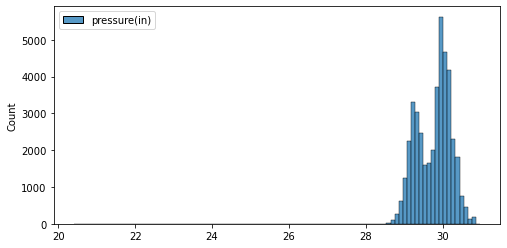

In [68]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['pressure(in)']], bins = 100);

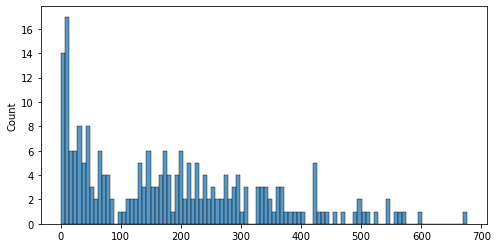

In [69]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['pressure(in)']].value_counts().sort_index(), bins = 100);

In [70]:
chi_df['pressure(in)'].fillna(29.88, inplace = True)

In [71]:
#weather_timestamp
chi_df[['weather_timestamp']].value_counts()

weather_timestamp  
2020-10-14 11:52:00    20
2020-12-29 12:52:00    16
2017-12-04 16:52:00    14
2020-06-19 15:52:00    14
2017-10-12 14:59:00    13
                       ..
2018-07-13 01:53:00     1
2017-01-10 07:29:00     1
2018-07-12 16:53:00     1
2017-01-10 07:51:00     1
2019-02-08 09:51:00     1
Length: 27922, dtype: int64

In [72]:
chi_df[['weather_timestamp']].value_counts().sort_index()

weather_timestamp  
2016-06-17 14:51:00    5
2016-06-17 14:52:00    1
2016-06-17 14:53:00    1
2016-06-17 15:52:00    1
2016-06-17 15:53:00    3
                      ..
2020-12-31 17:15:00    1
2020-12-31 17:35:00    1
2020-12-31 19:45:00    5
2020-12-31 20:52:00    4
2020-12-31 21:55:00    2
Length: 27922, dtype: int64

In [73]:
chi_df.dropna(subset = ['weather_timestamp'], inplace = True)

In [74]:
#checking null counts
chi_df.isna().sum().sort_values(ascending = False)

civil_twilight           1
nautical_twilight        1
city                     1
sunrise_sunset           1
astronomical_twilight    1
                        ..
stop                     0
station                  0
roundabout               0
railway                  0
weather_condition_nan    0
Length: 125, dtype: int64

In [75]:
#dropping the remaining nulls (remembering wind_direction and weather_condition have been ohe)
chi_df.dropna(subset = ['city',
                        'sunrise_sunset',
                        'astronomical_twilight',
                        'nautical_twilight',
                        'civil_twilight'], inplace = True)

**Addressing non-date Objects**

In [76]:
#Consider dropping all of 'street', 'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone', 'airport_code'?
#definitely atleast drop 'state' because we're only looking at Chicago, IL. 

In [77]:
#sunrise_sunset
chi_df[['sunrise_sunset']].value_counts()

sunrise_sunset
Day               28736
Night             13671
dtype: int64

In [78]:
#civil_twilight
chi_df[['civil_twilight']].value_counts()

civil_twilight
Day               30731
Night             11676
dtype: int64

In [79]:
#civil_twilight
chi_df[['nautical_twilight']].value_counts()

nautical_twilight
Day                  32894
Night                 9513
dtype: int64

In [80]:
#astronomical_twilight
chi_df[['astronomical_twilight']].value_counts()

astronomical_twilight
Day                      34661
Night                     7746
dtype: int64

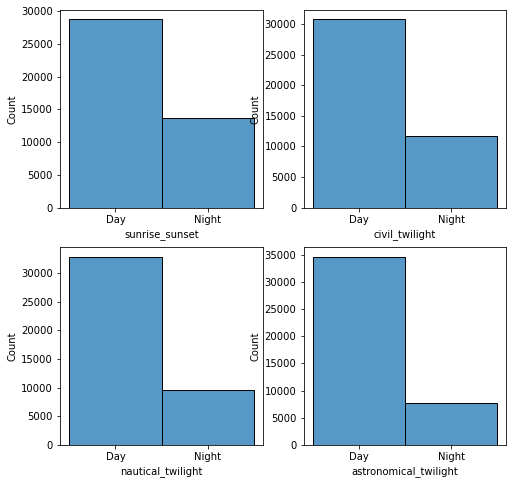

In [81]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

sns.histplot(data = chi_df, x = 'sunrise_sunset', ax = ax[0, 0])
sns.histplot(data = chi_df, x = 'civil_twilight', ax = ax[0,1])
sns.histplot(data = chi_df, x = 'nautical_twilight', ax = ax[1,0])
sns.histplot(data = chi_df, x = 'astronomical_twilight', ax = ax[1,1]);

In [82]:
#getting dummies for these variables, including the nulls
chi_df = pd.get_dummies(chi_df, 
               columns = ['sunrise_sunset', 
                          'civil_twilight',
                          'nautical_twilight',
                          'astronomical_twilight'],
               dummy_na = False,
               drop_first = True)

In [83]:
chi_df.head(3)

,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,civil_twilight_Night,nautical_twilight_Night,astronomical_twilight_Night
0,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,0.0,N Milwaukee Ave,R,Libertyville,Lake,IL,60048,US,US/Central,KUGN,2016-11-30 14:55:00,37.0,31.0,79.0,29.59,10.0,8.1,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,At US-14/Northwest Hwy - Accident.,21500.0,N IL Route 59,L,Barrington,Lake,IL,60010-2457,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,Between IL-22 and US-14/Northwest Hwy - Accident.

In [84]:
#checking null counts
chi_df.isna().sum().sort_values(ascending = False)

severity                                          0
weather_condition_Heavy Thunderstorms and Rain    0
weather_condition_Light Snow / Windy              0
weather_condition_Light Snow                      0
weather_condition_Light Rain with Thunder         0
                                                 ..
traffic_calming                                   0
stop                                              0
station                                           0
roundabout                                        0
astronomical_twilight_Night                       0
Length: 125, dtype: int64

In [85]:
chi_df.to_csv('../data/chi_df_no_nulls.csv', index=False)

**Looking At Categorical Variables** 

In [86]:
#for ease of reference:
chi_df.head(3)

,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,civil_twilight_Night,nautical_twilight_Night,astronomical_twilight_Night
0,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,0.0,N Milwaukee Ave,R,Libertyville,Lake,IL,60048,US,US/Central,KUGN,2016-11-30 14:55:00,37.0,31.0,79.0,29.59,10.0,8.1,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,At US-14/Northwest Hwy - Accident.,21500.0,N IL Route 59,L,Barrington,Lake,IL,60010-2457,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,Between IL-22 and US-14/Northwest Hwy - Accident.

In [87]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
chi_df.select_dtypes('O').head(3)

,start_time,end_time,description,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp
0,2016-11-30 14:46:48,2016-11-30 20:46:48,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,N Milwaukee Ave,R,Libertyville,Lake,IL,60048,US,US/Central,KUGN,2016-11-30 14:55:00
1,2016-11-30 14:58:59,2016-11-30 20:58:59,At US-14/Northwest Hwy - Accident.,N IL Route 59,L,Barrington,Lake,IL,60010-2457,US,US/Central,KPWK,2016-11-30 14:52:00
2,2016-11-30 15:14:24,2016-11-30 21:29:48,Between IL-22 and US-14/Northwest Hwy - Accident.,N IL Route 59,R,Barrington,Lake,IL,60010-2456,US,US/Central,KPWK,2016-11-30 14:52:00


In [88]:
chi_df.select_dtypes('O').columns

Index(['start_time', 'end_time', 'description', 'street', 'side', 'city',
       'county', 'state', 'zipcode', 'country', 'timezone', 'airport_code',
       'weather_timestamp'],
      dtype='object')

In [89]:
chi_df_for_nlp = chi_df[['severity', 'description']]
chi_df_for_nlp.head(3)

,severity,description
0,2,Between IL-137/Buckley Rd/Peterson Rd and IL-1...
1,2,At US-14/Northwest Hwy - Accident.
2,3,Between IL-22 and US-14/Northwest Hwy - Accident.


In [90]:
chi_df_for_nlp.to_csv('../data/chi_df_for_nlp.csv', index=False)

In [91]:
chi_df_no_words = chi_df.drop(columns = ['description', 'street', 'city', 'county',
                                         'state', 'zipcode', 'country', 'timezone'])

In [92]:
chi_df_no_words.head(3)

,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),number,side,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,civil_twilight_Night,nautical_twilight_Night,astronomical_twilight_Night
0,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,0.0,R,KUGN,2016-11-30 14:55:00,37.0,31.0,79.0,29.59,10.0,8.1,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,21500.0,L,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,21501.0,R,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [93]:
chi_df_no_words.to_csv('../data/chi_df_no_nulls_no_words.csv', index=False)

**Addressing the Time Series Variables**

In [94]:
#what to do with these guys? Convert to UNIX/EPOCH?
#https://www.unixtimestamp.com/index.php
chi_df_no_words[['start_time', 'end_time', 'weather_timestamp']]

,start_time,end_time,weather_timestamp
0,2016-11-30 14:46:48,2016-11-30 20:46:48,2016-11-30 14:55:00
1,2016-11-30 14:58:59,2016-11-30 20:58:59,2016-11-30 14:52:00
2,2016-11-30 15:14:24,2016-11-30 21:29:48,2016-11-30 14:52:00
3,2016-11-30 16:13:53,2016-11-30 22:13:53,2016-11-30 16:08:00
4,2016-11-30 16:33:05,2016-11-30 22:33:05,2016-11-30 16:39:00
...,...,...,...
42467,2019-08-23 17:41:30,2019-08-23 18:10:38,2019-08-23 17:35:00
42468,2019-08-23 18:26:04,2019-08-23 18:54:36,2019-08-23 18:51:00
42469,2019-08-23 19:10:56,2019-08-23 19:40:01,2019-08-23 18:55:00
42470,2019-08-23 21:04:04,2019-08-23 21:32:43,2019-08-23 20:55:00


In [95]:
#https://stackoverflow.com/questions/35630098/convert-a-column-of-datetimes-to-epoch-in-python
chi_df_no_words['start_time'] = pd.to_datetime(chi_df_no_words['start_time'])
chi_df_no_words['end_time'] = pd.to_datetime(chi_df_no_words['end_time'])
chi_df_no_words['weather_timestamp'] = pd.to_datetime(chi_df_no_words['weather_timestamp'])

In [96]:
chi_df_no_words[['start_time', 'end_time', 'weather_timestamp']].dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
weather_timestamp    datetime64[ns]
dtype: object

In [97]:
chi_df_no_words['start_time'] = (chi_df_no_words['start_time'] - dt.datetime(1970,1,1)).dt.total_seconds()
chi_df_no_words['end_time'] = (chi_df_no_words['end_time'] - dt.datetime(1970,1,1)).dt.total_seconds()
chi_df_no_words['weather_timestamp'] = (chi_df_no_words['weather_timestamp'] - dt.datetime(1970,1,1)).dt.total_seconds()

In [98]:
chi_df_no_words[['start_time', 'end_time', 'weather_timestamp']]

,start_time,end_time,weather_timestamp
0,1.480517e+09,1.480539e+09,1.480518e+09
1,1.480518e+09,1.480540e+09,1.480518e+09
2,1.480519e+09,1.480541e+09,1.480518e+09
3,1.480522e+09,1.480544e+09,1.480522e+09
4,1.480524e+09,1.480545e+09,1.480524e+09
...,...,...,...
42467,1.566582e+09,1.566584e+09,1.566582e+09
42468,1.566585e+09,1.566586e+09,1.566586e+09
42469,1.566587e+09,1.566589e+09,1.566586e+09
42470,1.566594e+09,1.566596e+09,1.566594e+09


In [99]:
chi_df_no_words['accident_duration'] = chi_df_no_words['end_time'] - chi_df_no_words['start_time']

In [100]:
#feature engineering a column for the total duration of an accident:
chi_df_no_words[['accident_duration']]

,accident_duration
0,21600.0
1,21600.0
2,22524.0
3,21600.0
4,21600.0
...,...
42467,1748.0
42468,1712.0
42469,1745.0
42470,1719.0


In [101]:
chi_df_no_words.head()

,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),number,side,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,civil_twilight_Night,nautical_twilight_Night,astronomical_twilight_Night,accident_duration
0,2,1.480517e+09,1.480539e+09,42.305960,-87.960150,42.306916,-87.960918,0.077,0.0,R,KUGN,1.480518e+09,37.0,31.0,79.0,29.59,10.0,8.1,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21600.0
1,2,1.480518e+09,1.480540e+09,42.175870,-88.135770,42.174620,-88.135794,0.086,21500.0,L,KPWK,1.480518e+09,37.0,28.1,76.0,29.62,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21600.0
2,3,1.480519e+09,1.480541e+09,42.175897,-88.135769,42.174612,-88.135794,0.089,21501.0,R,KPWK,1.480518e+09,37.0,28.1,76.0,29.62,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22524.0
3,3,1.480522e+0

In [102]:
chi_df_no_words['crossing'].value_counts()

False    39988
True      2419
Name: crossing, dtype: int64

In [103]:
bool_cols = ['amenity','bump','crossing','give_way','junction','no_exit','railway','roundabout','station','stop','traffic_calming','traffic_signal','turning_loop']
for col in bool_cols:
    chi_df_no_words[col] = chi_df_no_words[col].astype('int')

In [104]:
chi_df_no_words.head()

,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),number,side,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,civil_twilight_Night,nautical_twilight_Night,astronomical_twilight_Night,accident_duration
0,2,1.480517e+09,1.480539e+09,42.305960,-87.960150,42.306916,-87.960918,0.077,0.0,R,KUGN,1.480518e+09,37.0,31.0,79.0,29.59,10.0,8.1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21600.0
1,2,1.480518e+09,1.480540e+09,42.175870,-88.135770,42.174620,-88.135794,0.086,21500.0,L,KPWK,1.480518e+09,37.0,28.1,76.0,29.62,10.0,15.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21600.0
2,3,1.480519e+09,1.480541e+09,42.175897,-88.135769,42.174612,-88.135794,0.089,21501.0,R,KPWK,1.480518e+09,37.0,28.1,76.0,29.62,10.0,15.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22524.0
3,3,1.480522e+09,1.480544e+09,41.860591,-87.992749,41.860590,-87.992700,0.003,1194.0,R,KORD,1.480522e+09,37.0,30.4,76.0,29.61,10.0,9.2,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [105]:
chi_df_no_words['crossing'].value_counts()

0    39988
1     2419
Name: crossing, dtype: int64

In [106]:
chi_df_no_words.to_csv('../data/chi_df_model_ready.csv', index=False)

**Writing a Cleaning Function**

In [107]:
chi_df.dtypes

severity                         int64
start_time                      object
end_time                        object
start_lat                      float64
start_lng                      float64
                                ...   
weather_condition_nan            uint8
sunrise_sunset_Night             uint8
civil_twilight_Night             uint8
nautical_twilight_Night          uint8
astronomical_twilight_Night      uint8
Length: 125, dtype: object

In [108]:
#example for frame of reference:
list(chi_df.select_dtypes('object').columns)

['start_time',
 'end_time',
 'description',
 'street',
 'side',
 'city',
 'county',
 'state',
 'zipcode',
 'country',
 'timezone',
 'airport_code',
 'weather_timestamp']

In [271]:
chi_df = pd.read_csv('../data/chi_accidents.csv')
chi_df.head(3)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_direction,wind_speed(mph),precipitation(in),weather_condition,amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-2749141,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,NaN,N Milwaukee Ave,R,Libertyville,Lake,IL,60048,US,US/Central,KUGN,2016-11-30 14:55:00,37.0,31.0,79.0,29.59,10.0,West,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-2749152,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,At US-14/Northwest Hwy - Accident.,21500.0,N IL Route 59,L,Barrington,Lake,IL,60010-2457,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
2,A-2749158,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,Between IL-22 and US-14/Northwest Hwy - Accident.,21501.0,N IL Route 59,R,Barrington,Lake,IL,60010-2456,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [208]:
#https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
chi_df[chi_df.select_dtypes('bool').columns]

,amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42467,False,False,False,False,False,False,False,False,False,False,False,False,False
42468,False,False,False,False,False,False,False,False,False,False,False,False,False
42469,False,False,False,False,True,False,False,False,False,False,False,False,False
42470,False,False,False,False,True,False,False,False,False,False,False,False,False


In [272]:
def mrclean(dataframe):
    
    #dropping unnecessary:
    dataframe = dataframe.drop(columns = ['id', 'description', 'street', 'city', 'county',
                                          'state', 'zipcode', 'country', 'timezone', 'airport_code'])
    
    
    #converting to datetime:
    dataframe['start_time'] = pd.to_datetime(dataframe['start_time'])
    dataframe['end_time'] = pd.to_datetime(dataframe['end_time'])
    dataframe['weather_timestamp'] = pd.to_datetime(dataframe['weather_timestamp'])
    
    
    #dropping nas from datetime:
    dataframe = dataframe.dropna(subset = ['start_time', 'end_time', 'weather_timestamp'])
    
    
    #dealing with dates/times:
    dataframe['year'] = [int(date.strftime('%Y')) for date in dataframe['start_time']] # accident year
    dataframe['month'] = [int(date.strftime('%m')) for date in dataframe['start_time']] # accident year
    dataframe['week'] = [int(date.strftime('%U')) for date in dataframe['start_time']] # accident week of the year (week 0 is the days before the first sunday of the year)
    dataframe['day'] = [date.strftime('%A') for date in dataframe['start_time']] # accident day of the week
    dataframe['hour'] = [date.strftime('%H') for date in dataframe['start_time']] # 0 through 23, 24-hour cycle
    
    
    #creating epoch time categories:
    dataframe['start_time_ep'] = (dataframe['start_time'] - dt.datetime(1970,1,1))
    dataframe['start_time_ep'] = [date.total_seconds() for date in dataframe['start_time_ep']]
    
    dataframe['end_time_ep'] = (dataframe['end_time'] - dt.datetime(1970,1,1))
    dataframe['end_time_ep'] = [date.total_seconds() for date in dataframe['end_time_ep']]
    
    dataframe['weather_timestamp_ep'] = (dataframe['weather_timestamp'] - dt.datetime(1970,1,1))
    dataframe['weather_timestamp_ep'] = [date.total_seconds() for date in dataframe['weather_timestamp_ep']]
    
    
    #creating duration variable:
    dataframe['accident_duration'] = dataframe['end_time'] - dataframe['start_time']
    dataframe['accident_duration'] = [date.total_seconds() for date in dataframe['accident_duration']]
    
    
    #dropping original start_time/end_time variables:
    dataframe.drop(columns = ['start_time', 'end_time', 'weather_timestamp'], inplace = True)
    
    
    #dealing with object dtypes:
    dataframe = pd.get_dummies(dataframe, columns = list(dataframe.select_dtypes('object').columns), dummy_na = True, drop_first = True)
    
    
    #dealing with booleans:
    ##https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
    dataframe[dataframe.select_dtypes('bool').columns] = dataframe.select_dtypes('bool').astype(int)
    
    
    #fill appropriate null values:
    dataframe['number'] = dataframe.fillna(0)
    dataframe['wind_chill(f)'].fillna(dataframe['temperature(f)'], inplace = True)
    dataframe['precipitation(in)'] = dataframe.fillna(0)
    dataframe['wind_speed(mph)'] = dataframe.fillna(dataframe['wind_speed(mph)'].mean())
    
    
    #dropping null values:
    dataframe = dataframe.dropna()
    
    
    #dropping duplicate rows:
    dataframe.drop_duplicates(inplace = True)
    
    #feature engineering:

    return dataframe

In [273]:
chi_df = mrclean(chi_df)
chi_df

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),number,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,year,month,week,start_time_ep,end_time_ep,weather_timestamp_ep,accident_duration,side_R,side_nan,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,sunrise_sunset_nan,civil_twilight_Night,civil_twilight_nan,nautical_twilight_Night,nautical_twilight_nan,astronomical_twilight_Night,astronomical_twilight_nan,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day_nan,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_nan
0,2,42.305960,-87.960150,42.306916,-87.960918,0.077,2.0,37.0,31.0,79.0,29.59,10.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,11,48,1.480517e+09,1.480539e+09,1.480518e+09,21600.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,42.175870,-88.135770,42.174620,-88.135794,0.086,2.0,37.0,28.1,76.0,29.62,10.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,11,48,1.480518e+09,1.480540e+09,1.480518e+09,21600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,